### Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [ ]:
df_croix = pd.read_csv('https://testwild2019.s3-eu-west-1.amazonaws.com/domaine_des_croix.csv')
df_croix = df_croix.drop(columns = {"Unnamed: 0"})

In [ ]:
df_wine = pd.read_csv('https://testwild2019.s3-eu-west-1.amazonaws.com/wine_dataset.csv')
df_wine = df_wine.drop(columns = {"Unnamed: 0"})

### Exploration

In [ ]:
df_wine.shape

(129957, 13)

In [ ]:
df_wine.nunique()

country                      43
description              119942
designation               37975
points                       21
price                       390
province                    425
region_1                   1228
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118827
variety                     707
winery                    16756
dtype: int64

In [ ]:
df_wine.isna().sum()

country                     63
description                  0
designation              37460
points                       0
price                     8993
province                    63
region_1                 21247
region_2                 79446
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
df_wine.describe()

points          price
count  111583.000000  111583.000000
mean       88.413513      35.615380
std         3.098499      42.099867
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000

### PreProcessing

#### df_wine

In [ ]:
df_wine = df_wine.dropna(axis=0, subset=['price'])
df_wine = df_wine.drop_duplicates()

In [ ]:
# Isoler la date
import re

df_wine['date'] = df_wine['title'].str.extract(pat = '([1-2][09]\d{2})')

In [ ]:
df_wine['date'].fillna(2013, inplace = True)

In [ ]:
df_wine['date'] = df_wine['date'].astype(int)

In [ ]:
df_wine.set_value(29996, 'date', 2013)
df_wine.set_value(53221, 'date', 2011)
df_wine.set_value(77989, 'date', 2014)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


country  ...  date
1       Portugal  ...  2011
2             US  ...  2013
3             US  ...  2013
4             US  ...  2012
5          Spain  ...  2011
...          ...  ...   ...
129952   Germany  ...  2013
129953        US  ...  2004
129954    France  ...  2013
129955    France  ...  2012
129956    France  ...  2012

[111583 rows x 14 columns]

#### df_croix

In [ ]:
df_croix['date'] = df_croix['title'].str.extract(pat = '([1-2][09]\d{2})')

In [ ]:
df_wine['date'] = df_wine['date'].astype(int)

In [ ]:
df_croix.head()

country  ...  date
0  France  ...  2012
1  France  ...  2013
2  France  ...  2012
3  France  ...  2015
4  France  ...  2013

[5 rows x 14 columns]

### Analyse du marché (sur Power BI)

In [ ]:
# Export pour analyse
#df_wine.to_csv('df_wine')
#files.download('df_wine')

### NLP

#### Préparation

In [ ]:
df_nlp = df_wine.copy()

In [ ]:
import nltk
#nltk.download()
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [ ]:
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

In [ ]:
df_nlp['description'] = df_nlp['description'].apply(lambda x: remove_punctuation(x))

In [ ]:
df_nlp['description'].head()

1    This is ripe and fruity a wine that is smooth ...
2    Tart and snappy the flavors of lime flesh and ...
3    Pineapple rind lemon pith and orange blossom s...
4    Much like the regular bottling from 2012 this ...
5    Blackberry and raspberry aromas show a typical...
Name: description, dtype: object

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
df_nlp['description'] = df_nlp['description'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [ ]:
df_nlp['description'].head()

1    [this, is, ripe, and, fruity, a, wine, that, i...
2    [tart, and, snappy, the, flavors, of, lime, fl...
3    [pineapple, rind, lemon, pith, and, orange, bl...
4    [much, like, the, regular, bottling, from, 201...
5    [blackberry, and, raspberry, aromas, show, a, ...
Name: description, dtype: object

In [ ]:
# Stopwords
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = [w for w in text if w not in stop_words]
  return words

In [ ]:
df_nlp['description'] = df_nlp['description'].apply(lambda x: remove_stopwords(x))

In [ ]:
df_nlp['description'].head()

1    [ripe, fruity, wine, smooth, still, structured...
2    [tart, snappy, flavors, lime, flesh, rind, dom...
3    [pineapple, rind, lemon, pith, orange, blossom...
4    [much, like, regular, bottling, 2012, comes, a...
5    [blackberry, raspberry, aromas, show, typical,...
Name: description, dtype: object

In [ ]:
# Lemmatizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
  lem_text = [lemmatizer.lemmatize(i) for i in text]
  return lem_text

In [ ]:
df_nlp['description'] = df_nlp['description'].apply(lambda x: word_lemmatizer(x))

In [ ]:
# Stemmer
stemmer = PorterStemmer()

def word_stemmer(text):
  stem_text = " ".join([stemmer.stem(i) for i in text])
  return stem_text

In [ ]:
df_nlp['description'] = df_nlp['description'].apply(lambda x: word_stemmer(x))

In [ ]:
df_nlp['description'].head()

1    ripe fruiti wine smooth still structur firm ta...
2    tart snappi flavor lime flesh rind domin green...
3    pineappl rind lemon pith orang blossom start a...
4    much like regular bottl 2012 come across rathe...
5    blackberri raspberri aroma show typic navarran...
Name: description, dtype: object

#### Démonstration

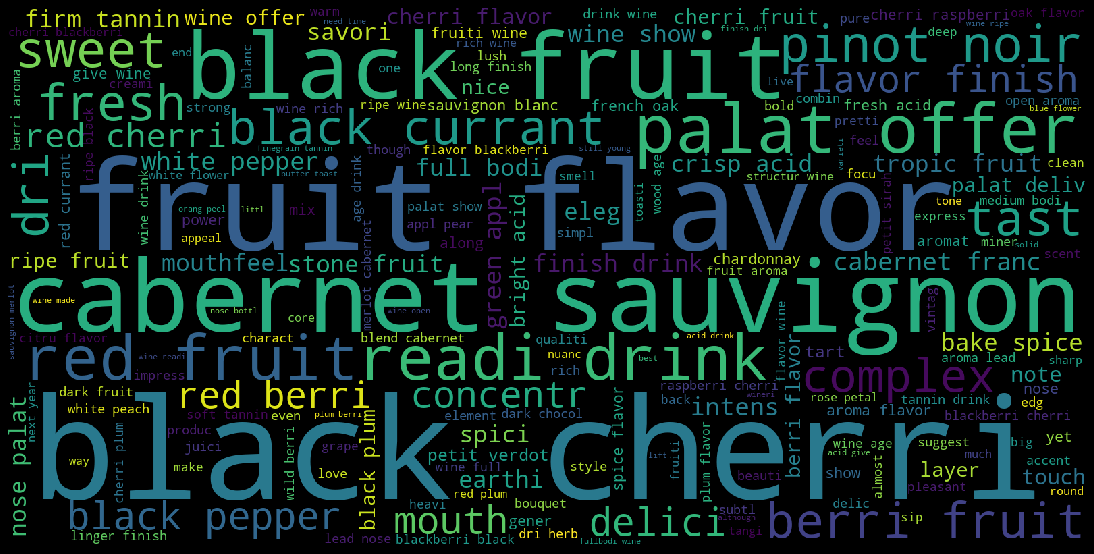

In [ ]:
'''WordCloud wine'''

# Libraries
from wordcloud import WordCloud

# Create the wordcloud object
wordcloud = WordCloud(width = 1600, height = 800).generate(' '.join(df_nlp['description']))

# Display the generated image:
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

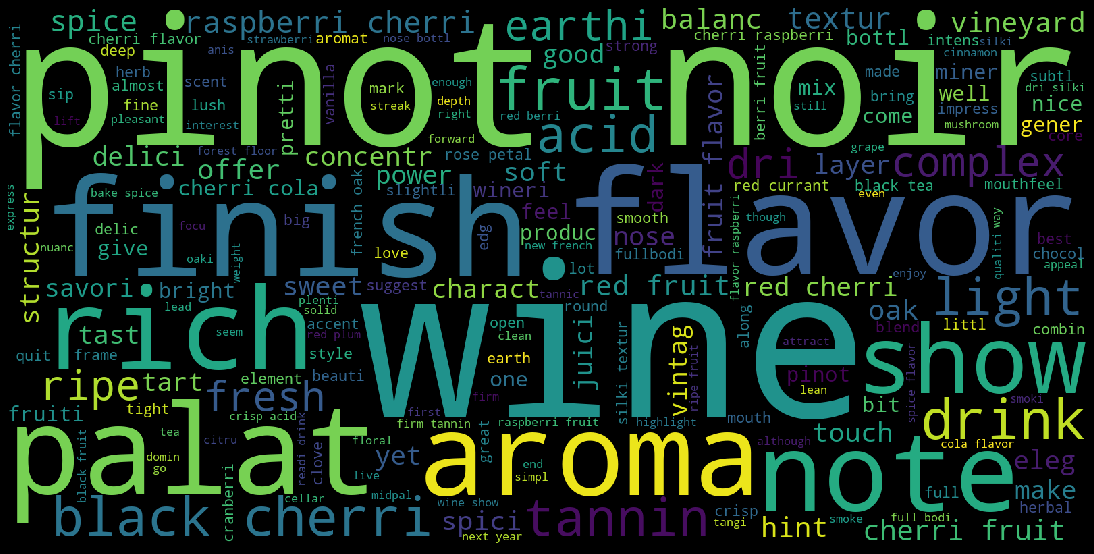

In [ ]:
'''WordCloud Pinot Noir'''

# Libraries
from wordcloud import WordCloud

# Create the wordcloud object
wordcloud = WordCloud(width = 1600, height = 800).generate(' '.join(df_nlp['description'][df_nlp['variety'] == 'Pinot Noir']))

# Display the generated image:
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

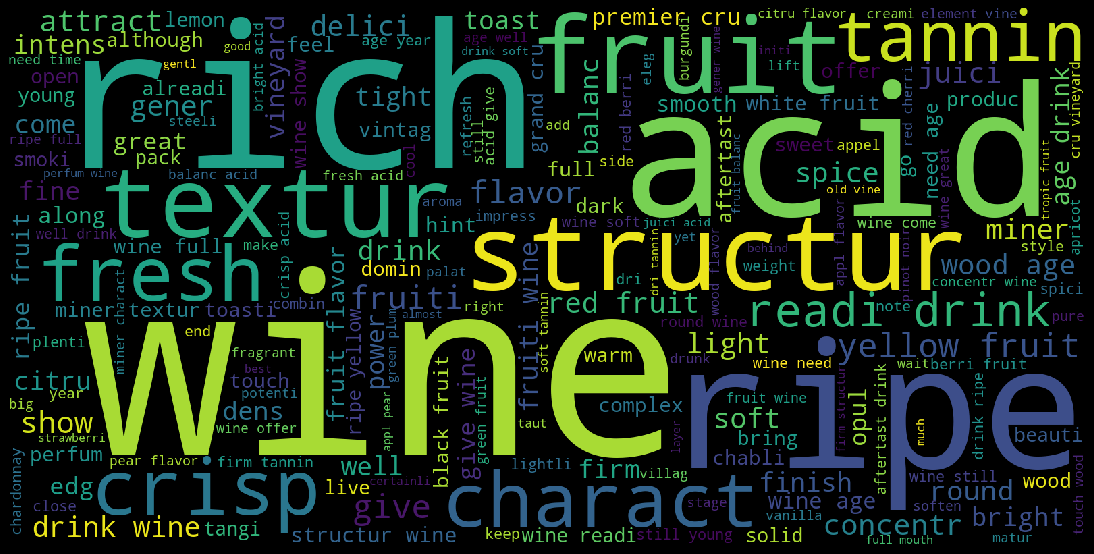

In [ ]:
'''WordCloud Pinot Noir'''

# Libraries
from wordcloud import WordCloud

# Create the wordcloud object
wordcloud = WordCloud(width = 1600, height = 800).generate(' '.join(df_nlp['description'][df_nlp['province'] == 'Burgundy']))

# Display the generated image:
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Machine Learning (partie 1 : numérique)

In [ ]:
df = df_wine.copy()

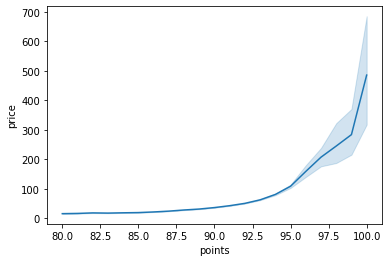

In [ ]:
ax = sns.lineplot(x="points", y="price", data=df)

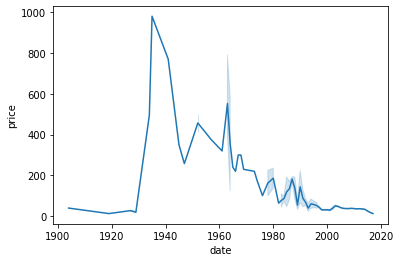

In [ ]:
ax = sns.lineplot(x="date", y="price", data=df)

In [ ]:
X = df[['points', 'date']]
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(78108, 2) (78108,)
(33475, 2) (33475,)


#### Linear regression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.20873100906999642

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(reg, X_train, y_train, cv = 10)

array([0.20995086, 0.19558862, 0.15221803, 0.20635191, 0.15917631,
       0.23909729, 0.19425192, 0.11487272, 0.20599108, 0.21532756])

#### KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range :
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing accuracy')

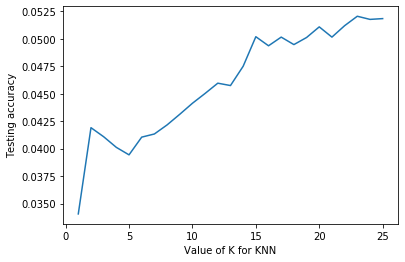

In [ ]:
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')

In [ ]:
from math import sqrt

rmse_val = [] # Pour ranger les différentes valeurs de k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  # On fit
    pred = model.predict(X_test) # On fait la prédiction
    error = sqrt(mean_squared_error(y_test, pred)) # Calcul du rmse
    rmse_val.append(error) # Rangement des résultats du calcul du rmse
    print('Valeurs du rmse pour k = ' , K , 'est :', error)

Valeurs du rmse pour k =  1 est : 40.53612385579871
Valeurs du rmse pour k =  2 est : 40.60248548870654
Valeurs du rmse pour k =  3 est : 37.734276478495126
Valeurs du rmse pour k =  4 est : 36.520031193045014
Valeurs du rmse pour k =  5 est : 35.76248456906115
Valeurs du rmse pour k =  6 est : 35.27704682284932
Valeurs du rmse pour k =  7 est : 34.86275524656997
Valeurs du rmse pour k =  8 est : 34.692937516417764
Valeurs du rmse pour k =  9 est : 34.351009398567065
Valeurs du rmse pour k =  10 est : 34.07916158554061
Valeurs du rmse pour k =  11 est : 34.07620390929103
Valeurs du rmse pour k =  12 est : 33.9130717176983
Valeurs du rmse pour k =  13 est : 33.73955024676492
Valeurs du rmse pour k =  14 est : 33.72564207824766
Valeurs du rmse pour k =  15 est : 33.663944506018574
Valeurs du rmse pour k =  16 est : 33.48185938233509
Valeurs du rmse pour k =  17 est : 33.518692166147716
Valeurs du rmse pour k =  18 est : 33.40344495155332
Valeurs du rmse pour k =  19 est : 33.379707649676

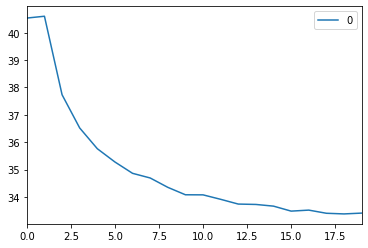

In [ ]:
# On fait la visualisation pour le rmse en fonction de k

curve = pd.DataFrame(rmse_val)
_ = curve.plot()

In [ ]:
# On cherche maintenant la meilleure valeur de k en fonction du nombre de classe que l'on veut faire

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=14)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors = 5)
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# Predict

y_pred = neigh.predict(X_test)

In [ ]:
# Accuracy score
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.17258027382849972


In [ ]:
# Gridsearch
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [24, 25, 26]}

In [ ]:
clf = GridSearchCV(neigh, parameters)

clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                                         19, 20, 21, 22, 23, 24, 25, 26]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Meilleurs paramètres
print(clf.best_score_)
print(clf.best_estimator_)

0.27225012171626944
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                    weights='uniform')


In [ ]:
# Application sur df_croix
df_test = df_croix.copy()
df_croix.head()

country  ...  date
0  France  ...  2012
1  France  ...  2013
2  France  ...  2012
3  France  ...  2015
4  France  ...  2013

[5 rows x 14 columns]

In [ ]:
X_croix = df_test[['points', 'date']]
y_croix = df_test['price']

In [ ]:
y_croix_pred = neigh.predict(X_croix)

In [ ]:
df_croix['price'] = y_croix_pred

In [ ]:
df_croix.head()

country  ...  date
0  France  ...  2012
1  France  ...  2013
2  France  ...  2012
3  France  ...  2015
4  France  ...  2013

[5 rows x 14 columns]

### Machine Learning (partie 2 : catégories)

#### Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
df2 = df_wine.copy()

In [ ]:
df2.head()

country  ...  date
1  Portugal  ...  2011
2        US  ...  2013
3        US  ...  2013
4        US  ...  2012
5     Spain  ...  2011

[5 rows x 14 columns]

In [ ]:
df2.country = df2.country.fillna(0)

In [ ]:
pays = {'US' : 1, 'France' : 2, 'Italy' : 3, 'Spain' : 4, 'Portugal' : 5, 'Chile' : 6, 'Argentina' : 7, 'Austria' : 8, 'Australia' : 9, 'Germany' : 10}

In [ ]:
for index, row in df2.iterrows():
  if row['country'] in pays:
    df2.set_value(index, 'country', pays[row['country']])
  else:
    df2.set_value(index, 'country', 11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [ ]:
variete = {'Bordeaux-style Red Blend': 5, 'Cabernet Sauvignon': 3, 'Chardonnay': 2, 'Merlot': 10, 'Pinot Noir': 1, 'Red Blend': 4,
           'Riesling': 6, 'Rosé': 9, 'Sauvignon Blanc': 7, 'Syrah': 8}

In [ ]:
for index, row in df2.iterrows():
  if row['variety'] in variete:
    df2.set_value(index, 'variety', variete[row['variety']])
  else:
    df2.set_value(index, 'variety', 11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
province = {'Alsace': 12, 'Bordeaux': 5, 'Burgundy': 9, 'California': 1, 'Champagne': 16, 'Douro': 20, 'Loire Valley': 14, 'Mendoza Province': 7, 'New York': 10,
            'Northeastern Italy': 13, 'Northern Spain': 6, 'Oregon': 3, 'Piedmont': 8, 'Sicily & Sardinia': 15, 'South Australia': 17, 'Southern Italy': 19,
            'Southwest France': 18, 'Tuscany': 4, 'Veneto': 11, 'Washington': 2}

In [ ]:
for index, row in df2.iterrows():
  if row['province'] in province:
    df2.set_value(index, 'province', province[row['province']])
  else:
    df2.set_value(index, 'province', 21)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


#### Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X = df2[['country', 'points', 'province', 'variety', 'date']]
y = df2['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [ ]:
# Selection modeles
steps = [('forest', RandomForestRegressor())]

pipeline = Pipeline(steps)

In [ ]:
forest = RandomForestRegressor(n_estimators = 100, min_samples_split = 0.5)

In [ ]:
# Selection parametres
parametres = {'n_estimators' : [10, 50, 100, 200],
              'min_samples_split' : [0.1, 0.2, 0.5]}

In [ ]:
grid = GridSearchCV(forest, parametres, cv=5)

In [ ]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print ("score = %3.2f" %(forest.score(X_test,y_test)))

score = 0.21


In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.21142124390670558

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

34.89011157769703

In [ ]:
X_croix = df2[['country', 'points', 'province', 'variety', 'date']]
y_croix = df_test['price']